<center>
<img src='https://imgs.xkcd.com/comics/t_distribution_2x.png' align='center' width="800x">
</center>

# Андан на экономе

## Семинар 13:  больше гипотез богу гипотез

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## Задание 0 (воспоминания)

Обсудите: 

- Чем непараметрические критерии отличаются от параметрических?
- Что такое $z-$тест и $t-$тест? Какие у них предпосылки? Чем они отличаются друг от друга?
- В каких случаях $z-$тест будет работать плохо?
- В каких случаях $t-$тест будет работать плохо?

Обсудите:

- Что такое критерии знаков? 
- Какие у них предпосылки? 
- Как выглядит нулевая гипотеза? 
- Как выглядит формула для подсчёта критерия?

Обсудите:

- Какие прдпосылки есть у теста Манна-Уитни? 
- Как выглядит проверяемая нулевая гипотеза? 
- Как выглядит формула для подсчёта критерия?
- В каких случаях тест Манна-Уитни будет работать плохо?

Если забыли, то вот вам реклама лекций Фила (опять): 

- [Видосы с курсеры](https://www.youtube.com/watch?v=2p24KPez62U&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L)
- [Лекция про непараметрические критерии из ФКНовской магистратуры](https://www.youtube.com/watch?v=0Rn6ImS0WK4)

## Задание 1 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [2]:
df = pd.read_csv('df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

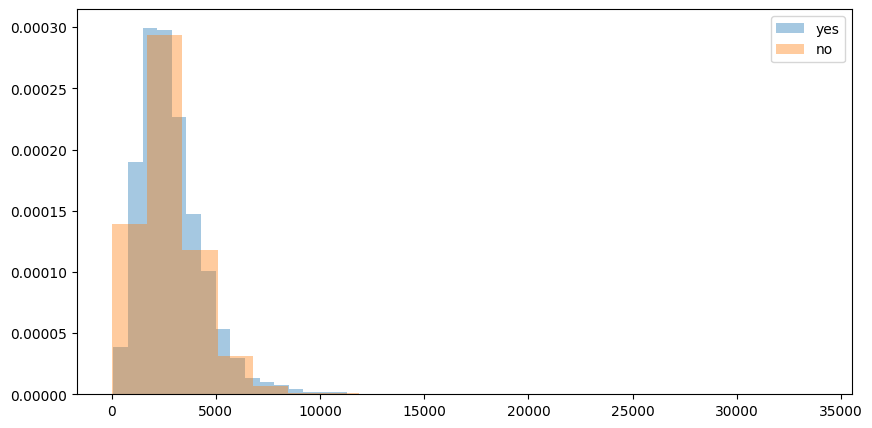

In [3]:
x = df[df['I']== True]['likes'].values
y = df[df['I']== False]['likes'].values

plt.figure(figsize=(10,5))
plt.hist(x, bins=20, density=True, alpha=0.4, label='yes')
plt.hist(y, bins=20, density=True, alpha=0.4, label='no')
plt.legend();

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [4]:
print(np.mean(x), np.median(x))
print(np.mean(y), np.median(y))

2879.1828885400314 2588.5
2784.0432051478474 2497.0


Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [5]:
alpha = 0.05 

diff = x.mean() - y.mean() 
diff_std = np.sqrt(x.var(ddof=1)/x.size + y.var(ddof=1)/y.size)
z_obs = diff/diff_std
z_obs

2.6644610922505323

Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [6]:
z_crit = sts.norm.ppf(1 - alpha/2)
pval = 2*sts.norm.cdf(-z_obs)
z_crit, pval

(1.959963984540054, 0.00771117860544288)

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае использовать другой критерий. Например, критерий Манна-Уитни.

Найдите наблюдаемое значение статистики Манна-Уитни. Сравните его с критическим. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Отличается ли полученный вывод от вывода $z$-теста?

In [8]:
U, pval = sts.mannwhitneyu(x, y, alternative='two-sided')
U

8604129.5

In [9]:
pval

0.01004067464288777

Значение статистики можно найти через ранги.

In [10]:
xy = np.concatenate((x,y))

# нашли ранги и дальше просуммировали
R1 = sts.rankdata(xy)[:len(x)]
R1.sum(axis=-1) - len(x)*(len(x) + 1)/2

8604129.5

In [11]:
from collections import Counter

# ранги быввают дробные, когда равенства :)
Counter(R1).most_common()[:3]

[(3908.5, 7), (3387.5, 5), (1640.0, 4)]

Можно посчитать значение статистики циклом, сравнивая между собой элементы.

In [13]:
U = 0

for item in x:
    for jtem in y:
        U += (item > jtem)
        U += 0.5*(item == jtem) # половинка (прям как в roc-auc)
U

8604129.5

## Задание 2 (ломаем тест Манна-Уитни)

Придумайте пример, на котором тест Манна-Уитни не будет работать. 

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим. 

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


<center>
<img src='https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/sem12_more_ab/mw.png' align='center' width="300x">
</center>


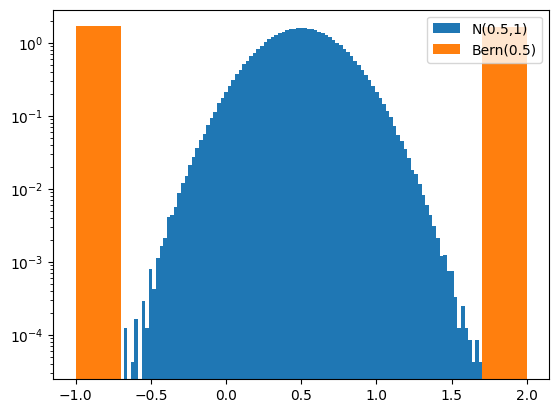

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as sts

n_obs = 10**6
x = sts.norm(0.5, 0.25).rvs(n_obs)
y = 3*sts.bernoulli(0.5).rvs(n_obs) - 1

# В результате АБ-теста произошла поляризация мнений!

plt.hist(x, bins=100, density=True, label='N(0.5,1)');
plt.hist(y, density=True, label='Bern(0.5)', log=True);
plt.legend();

In [15]:
# Тест Манна-Уитни говорит, что изменений нет, хотя они, очевидно, есть :(
_, pval = sts.mannwhitneyu(x, y, alternative='two-sided')
pval

0.6380969990810177

In [16]:
# А вот тест Колмогорова-Смирнова заметит изменения :) 
# Сможете объяснить почему? 
sts.ks_2samp(x, y)

KstestResult(statistic=0.500189, pvalue=0.0, statistic_location=-1.0, statistic_sign=-1)

## Задание 3 (мимимишные мышки)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

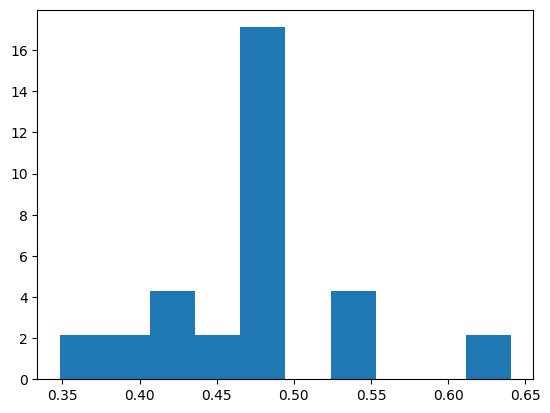

In [17]:
x = pd.read_csv('mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение. 

In [18]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue_1 = sign_test(x, mu0=0.5)
pvalue_1

0.021270751953125

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение. 

In [19]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue_2 = sts.wilcoxon(x - 0.5)
pvalue_2

0.09344482421875

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение. 

In [20]:
from statsmodels.stats.weightstats import ztest,zconfint

_, pvalue_3 = ztest(x, value=0.5)
pvalue_3, x.mean()

(0.13460721078205806, 0.47528889375)